Привет, Владимир!

Меня зовут Вячеслав Погорелый, и я буду проводить ревью твоего проекта. 

Предлагаю перейти на "ты", если не против)

Но если это не удобно - дай знать, и мы перейдем на "вы". Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Я отметил комментарии и замечания разным цветом далее по тексту markdown:

---    
<div class="alert alert-block alert-danger">
    
### Ошибка
    
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
    
### Совет
    
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
    
### Успех
    
Когда всё сделано правильно.
</div>
    
    
    
Будет здорово, если для ответов ты выберешь любой **<font color="maroon">читабельный и заметный цвет</font>**, так мне будет проще все проверить.


При доработке проекта попрошу тебя сохранить и не видоизменять заметки ревьюера, это осложняет повторную проверку

<div class="alert alert-block alert-success">
 
# Итоговый Комментарий ревьюера ver.2
    
#### Успех
    
Спасибо тебе за доработку проекта. Вот теперь я его готов принять. От себя я хочу пожелать успехов в дальнешей учебе. Ты точно справишься и дальше, я уверен в этом. 

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## 1. Откройте файл с данными и изучите общую информацию

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Хвалю за вступление в проект. Есть подробное описание и информация о данных.
</div 

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import missingno as msno

In [2]:
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19365,20,2350000.0,65.3,2017-11-20T00:00:00,3,2.50,5.0,45.70,2,NaN,...,7.1,NaN,деревня Лопухинка,NaN,NaN,NaN,NaN,NaN,NaN,385.0
1601,18,4200000.0,50.5,2018-10-04T00:00:00,2,NaN,19.0,28.10,11,NaN,...,9.0,NaN,посёлок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,51.0
22037,15,10900000.0,145.0,2017-04-17T00:00:00,2,3.50,2.0,39.00,2,False,...,10.0,0.0,Пушкин,15337.0,27490.0,3.0,216.0,3.0,153.0,188.0
7315,19,7250000.0,54.0,2019-02-26T00:00:00,2,2.50,12.0,32.00,6,NaN,...,10.1,2.0,Санкт-Петербург,33044.0,14208.0,0.0,NaN,0.0,NaN,11.0
4685,4,3900000.0,41.1,2018-01-11T00:00:00,1,NaN,24.0,NaN,23,NaN,...,NaN,NaN,посёлок Парголово,53561.0,19070.0,0.0,NaN,0.0,NaN,12.0
9033,10,7500000.0,67.0,2017-06-09T00:00:00,2,2.70,10.0,36.00,8,NaN,...,14.0,1.0,Санкт-Петербург,33707.0,12319.0,0.0,NaN,0.0,NaN,374.0
2368,9,4800000.0,77.6,2017-09-28T00:00:00,3,NaN,8.0,51.90,6,NaN,...,11.4,5.0,Красное Село,27678.0,31102.0,0.0,NaN,0.0,NaN,68.0
3629,8,5350000.0,60.6,2016-10-07T00:00:00,2,3.00,16.0,32.60,13,NaN,...,12.6,NaN,Санкт-Петербург,25740.0,14951.0,0.0,NaN,0.0,NaN,686.0
18569,18,7500000.0,70.0,2018-08-07T00:00:00,2,2.75,10.0,38.40,6,NaN,...,13.2,NaN,Санкт-Петербург,33365.0,14389.0,0.0,NaN,1.0,153.0,101.0
6547,9,2450000.0,45.0,2017-05-03T00:00:00,2,2.55,2.0,30.08,1,NaN,...,5.0,0.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,37.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

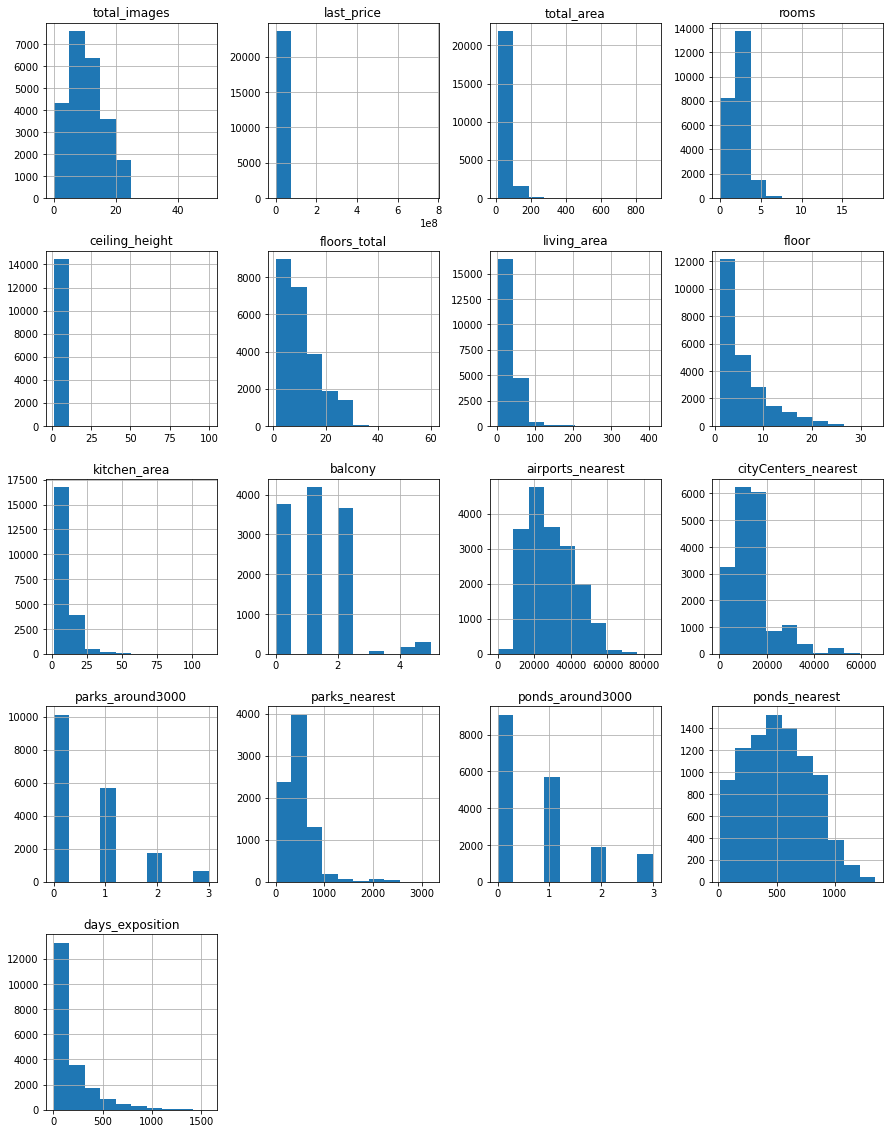

In [5]:
data.hist(figsize=(15, 20))

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет

Чтобы убрать текстовые предупреждения перед графиками, используй plt.show()

In [6]:
data.duplicated().sum() # дубликаты отсутствуют

0

In [7]:
data.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

#### 1.1 Мы видим, что всего в данных 23699 вхождений. Наименования столбцов корректны, тем не менее, необходимо сделать их чуть более понятными для восприятия, а также привести все заголовки к нижнему регистру.

В большинстве столбцов есть пропущенные значения. Исправим!

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
C данными мы ознакомились первично и можем двигаться дальше 

## 2. Выполните предобработку данных


На данном этапе, предлагаю переименовать названия колонок для большего удобства, а также отсортировать их в более логичной последовательности

In [8]:
data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [9]:
# заранее переименуем столбцы для следующих шагов, добавив единицы измерения
cols_to_rename = ['total_images',
        'last_price',
        'total_area_m2',
        'first_day_exposition',
        'number_of_rooms',
        'ceiling_height_m',
        'total_floors_in_house',
        'living_area_m2',
        'floor',
        'is_apartment',
        'is_studio',
        'is_open_plan',
        'kitchen_area_m2',
        'number_of_balconies',
        'locality_name',
        'nearest_airport_distance_km',
        'city_center_distance_km',
        'parks_numbers_within_3km',
        'nearest_park_distance_km',
        'ponds_number_within_3km',
        'nearest_pond_distance_km',
        'days_exposition']

data = data.set_axis(cols_to_rename, axis='columns')

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Тебе можем пригодится такой способ приведения к нижнему регистру df.columns = df.columns.str.lower()

В одной из итерраций кода я так и делал. Решил что в данной итеррации он не пригодится, так как переименование колонок происходило в ручном режиме.

In [10]:
# Уберем метры из столбцов с геоданными. Приведем все к километрам
data['city_center_distance_km'] = round(data['city_center_distance_km'] / 1000)
data['nearest_airport_distance_km'] = round(data['nearest_airport_distance_km'] / 1000)
data['nearest_park_distance_km'] = round(data['nearest_park_distance_km'] / 1000)
data['nearest_pond_distance_km'] = round(data['nearest_pond_distance_km'] / 1000)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   total_images                 23699 non-null  int64  
 1   last_price                   23699 non-null  float64
 2   total_area_m2                23699 non-null  float64
 3   first_day_exposition         23699 non-null  object 
 4   number_of_rooms              23699 non-null  int64  
 5   ceiling_height_m             14504 non-null  float64
 6   total_floors_in_house        23613 non-null  float64
 7   living_area_m2               21796 non-null  float64
 8   floor                        23699 non-null  int64  
 9   is_apartment                 2775 non-null   object 
 10  is_studio                    23699 non-null  bool   
 11  is_open_plan                 23699 non-null  bool   
 12  kitchen_area_m2              21421 non-null  float64
 13  number_of_balcon

#### 2.1 Теперь изменим типы данных в колонках first_day_exposition(datetime) и is_apartment(bool), а также уберем пропуски в "балконах"

In [12]:
# Напишем функцию, которая будет передавать словарь, по которому будет проходиться цикл for, и заполнять пропущенные значения.
# На данный момент можно уверенно заполнить 2 колонки из 22
def fill_missing_values(df):
    fill_methods = {
        'is_apartment': False,
        'number_of_balconies': 0,
    }
    
    # заполняем пропученные значения 
    for column, value in fill_methods.items():
        df[column].fillna(value, inplace=True)
    
    return data

In [13]:
data = fill_missing_values(data)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   total_images                 23699 non-null  int64  
 1   last_price                   23699 non-null  float64
 2   total_area_m2                23699 non-null  float64
 3   first_day_exposition         23699 non-null  object 
 4   number_of_rooms              23699 non-null  int64  
 5   ceiling_height_m             14504 non-null  float64
 6   total_floors_in_house        23613 non-null  float64
 7   living_area_m2               21796 non-null  float64
 8   floor                        23699 non-null  int64  
 9   is_apartment                 23699 non-null  bool   
 10  is_studio                    23699 non-null  bool   
 11  is_open_plan                 23699 non-null  bool   
 12  kitchen_area_m2              21421 non-null  float64
 13  number_of_balcon

In [14]:
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [15]:
data.isna().sum().sort_values()

total_images                       0
number_of_balconies                0
is_open_plan                       0
is_apartment                       0
floor                              0
is_studio                          0
number_of_rooms                    0
first_day_exposition               0
total_area_m2                      0
last_price                         0
locality_name                     49
total_floors_in_house             86
living_area_m2                  1903
kitchen_area_m2                 2278
days_exposition                 3181
parks_numbers_within_3km        5518
ponds_number_within_3km         5518
city_center_distance_km         5519
nearest_airport_distance_km     5542
ceiling_height_m                9195
nearest_pond_distance_km       14589
nearest_park_distance_km       15620
dtype: int64

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Визуализировать пропуски можем таким способом https://russianblogs.com/article/5001266235/

Пожалуй, сейчас и попробуем(после заполнения пропусков)! Спасибо за еще один интересный инструмент.

In [16]:
# Также, вполне возможно объяснить большое кол-во пропусков в парках и водоёмах в пределах 3х км. Вероятно, их там просто нет.
# Заменим пропуски в этих значениях на 0

data['parks_numbers_within_3km'] = data['parks_numbers_within_3km'].fillna(0).astype('int32')
data['ponds_number_within_3km'] = data['ponds_number_within_3km'].fillna(0).astype('int32')

data.isna().sum().sort_values()

total_images                       0
ponds_number_within_3km            0
parks_numbers_within_3km           0
number_of_balconies                0
is_open_plan                       0
is_apartment                       0
floor                              0
is_studio                          0
number_of_rooms                    0
first_day_exposition               0
total_area_m2                      0
last_price                         0
locality_name                     49
total_floors_in_house             86
living_area_m2                  1903
kitchen_area_m2                 2278
days_exposition                 3181
city_center_distance_km         5519
nearest_airport_distance_km     5542
ceiling_height_m                9195
nearest_pond_distance_km       14589
nearest_park_distance_km       15620
dtype: int64

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для экономии вычислительной памяти лучше всего перевести в int32

Готово!

In [17]:
# Также, возможно удалить строки, в которых отсутствует наименование населенного пункта. Вероятно, что такие объявления даже не попадут в выдачу.
# Общее количество этажей в доме имеет всего 86 пропусков, которые также можно удалить без последствий. 
data.dropna(subset=['total_floors_in_house', 'locality_name'], inplace=True)
data['total_floors_in_house'] = data['total_floors_in_house'].astype('int32')# переводим этажность в целочисленный тип. Странно что до этого он был float

data.isna().sum().sort_values()

total_images                       0
ponds_number_within_3km            0
parks_numbers_within_3km           0
locality_name                      0
number_of_balconies                0
is_open_plan                       0
is_apartment                       0
floor                              0
is_studio                          0
total_floors_in_house              0
number_of_rooms                    0
first_day_exposition               0
total_area_m2                      0
last_price                         0
living_area_m2                  1865
kitchen_area_m2                 2222
days_exposition                 3171
city_center_distance_km         5501
nearest_airport_distance_km     5524
ceiling_height_m                9084
nearest_pond_distance_km       14529
nearest_park_distance_km       15535
dtype: int64

In [18]:
# меняем тип данных в first_day_exposition
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S") 

#data.info()  # <--- раскомментируйте для проверки

<AxesSubplot:>

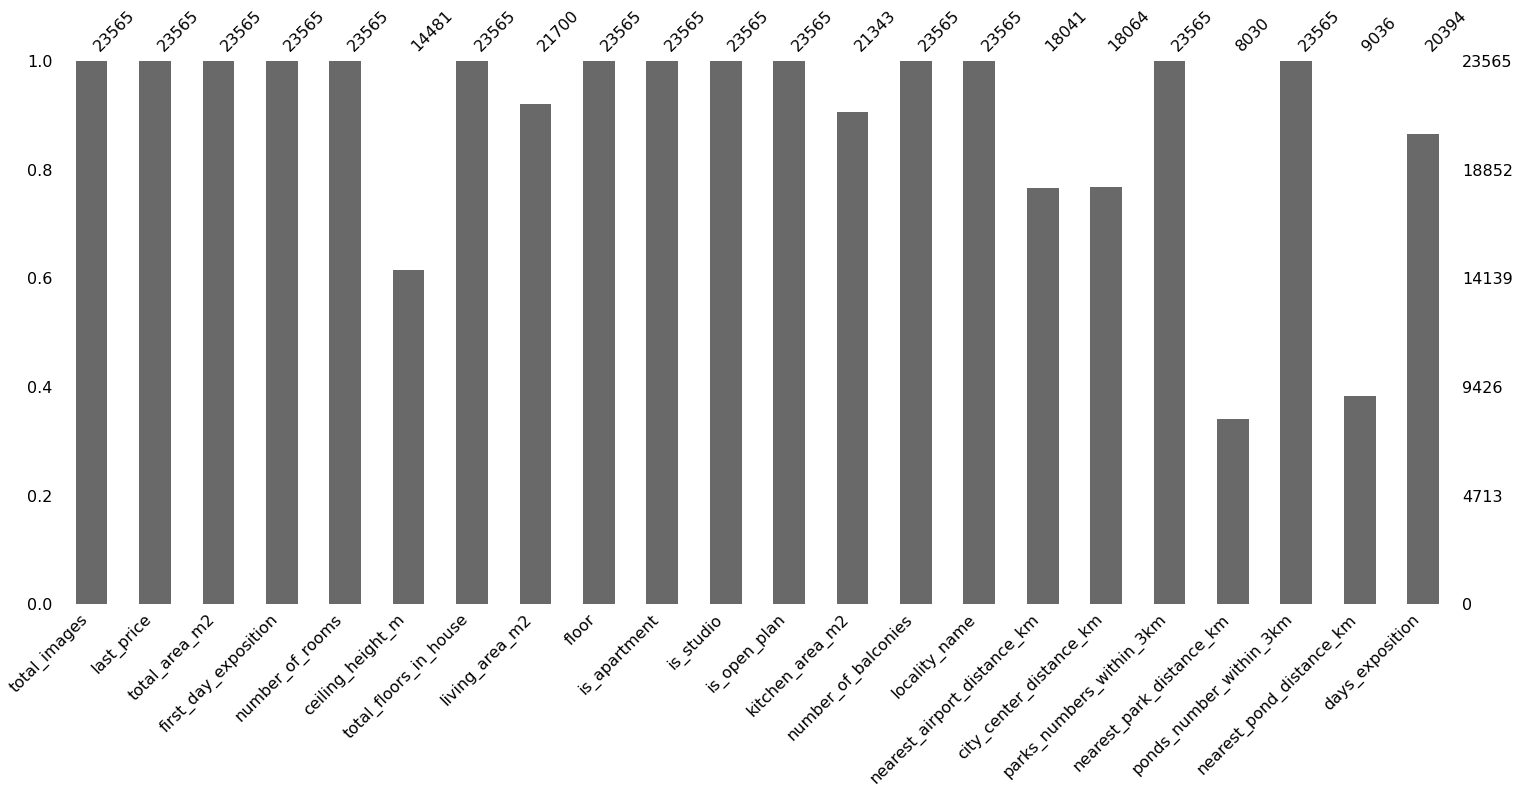

In [19]:
msno.bar(data)

Визуализируем оставшиеся пропуски!

#### 2.2 Теперь, когда мы изменили типы данных, можем углубиться в поиски неявных дубликатов. Можем начать с locality_name

In [20]:
print(data['locality_name'].unique()) # смотрим уникальные названия городов
print(data['locality_name'].nunique()) # считаем уникальные названия городов

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

#### 2.3 Список внушительный. Имеет 364 уникальных наименования. Попробуем его негмного почистить

In [21]:
data['locality_name']  = data['locality_name'].str.replace('ё', 'е') #
data['locality_name']  = data['locality_name'].str.replace('поселок городского типа', 'поселок') #
data['locality_name']  = data['locality_name'].str.replace('городской поселок', 'поселок') #
data['locality_name']  = data['locality_name'].replace('Мурино', 'поселок Мурино') #
#data['locality_name'].unique() #раскомментируйте для проверки

In [22]:
data['locality_name'].nunique() # удалось избавиться от 43-х неявных дубликата

321

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Отлично вышло здесь. Спасибо за то, что удалось посчитать количество оставшихся значений. 

#### 2.4 Посмотрим на ситуацию с потолками

In [23]:
data['ceiling_height_m'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height_m, dtype: float64

Видим что средняя высота потолков не сильно отличается от медианной. Стандартное отклонение примерно 1.2 м. 

<AxesSubplot:title={'center':'Высота потолков'}, ylabel='Frequency'>

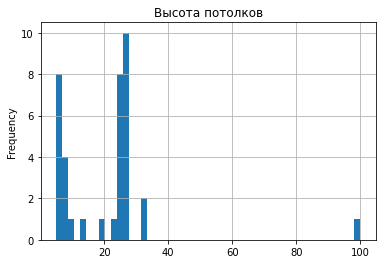

In [24]:
data['ceiling_height_m'].sort_values().plot(y='ceiling_height_m', kind='hist', grid=True , bins=50, range=(5, 100), title='Высота потолков') # построим гистограмму

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
А давай привыкнем оформлять графики правильно. Не забывай давать им названия. Сделать это можно командой title()

Готово!

In [25]:
#разделим на 10 высоту потолков больше 20м. Вероятно что могли быть допущены опечатки при заполнении.
data.loc[data['ceiling_height_m'] >= 20, 'ceiling_height_m'] = data['ceiling_height_m'] / 10

<AxesSubplot:title={'center':'Высота потолков'}, ylabel='Frequency'>

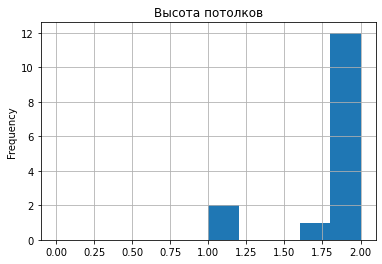

In [26]:
data['ceiling_height_m'].sort_values().plot(y='ceiling_height_m', kind='hist', grid=True ,bins=10, range=(0, 2), title="Высота потолков")

In [27]:
data.loc[(data['ceiling_height_m'] > 5) | (data['ceiling_height_m'] < 2) | (data['ceiling_height_m'].isna()), 'ceiling_height_m'] = data['ceiling_height_m'].median()
data['ceiling_height_m'].describe() 

count    23565.000000
mean         2.696022
std          0.215921
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height_m, dtype: float64

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Лишнее лаконичный получилось устранить. 

Отклонение стало минимальным. Все квартали теперь имеют разницу в 0.5 метра. Далее, глянем остальные параметры.

In [28]:
data[['number_of_rooms', 'total_area_m2', 'ceiling_height_m', 'days_exposition', 'last_price', 
      'living_area_m2',  'kitchen_area_m2', 'floor', 'total_floors_in_house']].describe().round()

,number_of_rooms,total_area_m2,ceiling_height_m,days_exposition,last_price,living_area_m2,kitchen_area_m2,floor,total_floors_in_house
count,23565.0,23565.0,23565.0,20394.0,23565.0,21700.0,21343.0,23565.0,23565.0
mean,2.0,60.0,3.0,181.0,6540058.0,34.0,11.0,6.0,11.0
std,1.0,36.0,0.0,220.0,10910935.0,22.0,6.0,5.0,7.0
min,0.0,12.0,2.0,1.0,12190.0,2.0,1.0,1.0,1.0
25%,1.0,40.0,3.0,45.0,3400000.0,19.0,7.0,2.0,5.0
50%,2.0,52.0,3.0,95.0,4646000.0,30.0,9.0,4.0,9.0
75%,3.0,70.0,3.0,231.0,6790000.0,42.0,12.0,8.0,16.0
max,19.0,900.0,5.0,1580.0,763000000.0,410.0,112.0,33.0,60.0


In [29]:
#посмотрим сколько квартир имеют 0 комнат
data.query('number_of_rooms == 0')

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,kitchen_area_m2,number_of_balconies,locality_name,nearest_airport_distance_km,city_center_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,2.65,24,15.50,2,False,...,NaN,2.0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,2.65,14,17.00,1,False,...,NaN,0.0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,2.65,17,24.75,4,False,...,NaN,2.0,Санкт-Петербург,38.0,15.0,0,NaN,2,1.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,2.65,26,24.30,19,False,...,NaN,1.0,поселок Парголово,53.0,19.0,0,NaN,1,1.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,2.65,10,NaN,7,False,...,NaN,0.0,поселок Шушары,NaN,NaN,0,NaN,0,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,2.65,25,18.00,16,False,...,NaN,0.0,Санкт-Петербург,11.0,13.0,0,NaN,1,1.0,14.0
23442,0,2500000.0,27.70,2017-09-28,0,2.65,24,18.00,4,False,...,NaN,2.0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07,0,2.65,19,NaN,8,False,...,NaN,0.0,Санкт-Петербург,18.0,17.0,0,NaN,2,0.0,31.0
23592,10,1450000.0,29.00,2017-11-11,0,2.65,9,18.00,8,False,...,NaN,2.0,Никольское,NaN,NaN,0,NaN,0,NaN,82.0


Нашли 194 квартиры, в которых 0 комнат

In [30]:
# проверим, сколько из них студий
data.query('number_of_rooms == 0 and is_studio == True')# из них 135 записей это студии

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,kitchen_area_m2,number_of_balconies,locality_name,nearest_airport_distance_km,city_center_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,2.65,24,15.50,2,False,...,NaN,2.0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,181.0
440,8,2480000.0,27.11,2018-03-12,0,2.65,17,24.75,4,False,...,NaN,2.0,Санкт-Петербург,38.0,15.0,0,NaN,2,1.0,64.0
608,2,1850000.0,25.00,2019-02-20,0,2.65,10,NaN,7,False,...,NaN,0.0,поселок Шушары,NaN,NaN,0,NaN,0,NaN,29.0
697,12,2500000.0,24.10,2017-12-01,0,2.75,25,17.50,21,False,...,NaN,0.0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,201.0
716,5,1500000.0,17.00,2017-06-07,0,2.70,9,12.00,1,False,...,NaN,0.0,поселок Шушары,19.0,30.0,0,NaN,0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17,0,2.65,25,18.20,5,False,...,NaN,0.0,Санкт-Петербург,35.0,16.0,0,NaN,1,0.0,211.0
22877,2,4280000.0,28.00,2017-10-26,0,2.70,19,18.00,10,False,...,NaN,0.0,Санкт-Петербург,19.0,7.0,0,NaN,1,0.0,151.0
23210,7,3200000.0,26.00,2017-09-01,0,2.65,25,18.00,16,False,...,NaN,0.0,Санкт-Петербург,11.0,13.0,0,NaN,1,1.0,14.0
23554,15,3350000.0,26.00,2018-09-07,0,2.65,19,NaN,8,False,...,NaN,0.0,Санкт-Петербург,18.0,17.0,0,NaN,2,0.0,31.0


#### 2.5 Из них 135 квартир - студии. Но студия - это комната сама по себе. Исправим. 

In [31]:
#заменим все значение 0 на 1, ведь студия это и есть комната, а оставшиеся квартиры по площади соответствуют однушкам
data.loc[data['number_of_rooms'] == 0, 'number_of_rooms'] = 1

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Согласен. Так сделать можно и в целом, логичное дейтсвие

In [32]:
len(data.loc[data['number_of_rooms'] > 7])# смотрим количество строк с аномальным количеством комнат

31

In [33]:
data = data[(data['number_of_rooms'] <= 7)]# удалим строки, где количество комнат больше 7, их всего 31.

In [34]:
data.query('last_price < 400000') # смотрим квартиры дешевле 400к руб.

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,kitchen_area_m2,number_of_balconies,locality_name,nearest_airport_distance_km,city_center_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,40.5,0.0,Санкт-Петербург,36.0,9.0,1,1.0,0,NaN,8.0


#### 2.6 Данная цена, указанная за недвижимость - очень низкая. С учётом того что следующие объявления начинаются, примерно от 450тыс. руб. Очень похоже на выброс. 

In [35]:
data.query('last_price > 400000000') # смотрим квартиры дороже 400млн руб.

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,kitchen_area_m2,number_of_balconies,locality_name,nearest_airport_distance_km,city_center_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,days_exposition
12971,19,763000000.0,400.0,2017-09-30,7,2.65,10,250.0,10,False,...,NaN,2.0,Санкт-Петербург,25.0,4.0,1,1.0,3,1.0,33.0
14706,15,401300000.0,401.0,2016-02-20,5,2.65,9,204.0,9,False,...,24.0,3.0,Санкт-Петербург,22.0,2.0,1,1.0,1,0.0,393.0


#### 2.7 Недвижимость за более чем 700млн рублей очень сильно отличается от всех. прежде всего ценой. Удалим эту строку, чтоб она не мешала рассчетам.

In [36]:
data = data.query('last_price > 400000 and last_price < 500000000')  # отбросим аномальные цены.

In [37]:
data.query('total_floors_in_house >= 37').sort_values(by='total_floors_in_house') # посмотрим дома по кол-ву этажей.

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,kitchen_area_m2,number_of_balconies,locality_name,nearest_airport_distance_km,city_center_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,days_exposition
16934,5,4100000.0,40.0,2017-10-17,1,2.65,37,17.4,5,False,...,8.34,0.0,Санкт-Петербург,19.0,20.0,0,NaN,3,0.0,71.0
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52,10.5,18,False,...,14.00,0.0,Санкт-Петербург,21.0,13.0,1,1.0,0,NaN,45.0
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60,27.4,4,False,...,7.40,0.0,Кронштадт,68.0,49.0,2,0.0,3,1.0,166.0


In [38]:
data = data.query('total_floors_in_house < 37')# отбрасываем дома выше 37 этажей, так как официально, самый высокий жилой дом в СПБ (ЖК Александр Невский) 

In [39]:
# Подсчитаем общее кол-во оставшихся строк.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23529 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_images                 23529 non-null  int64         
 1   last_price                   23529 non-null  float64       
 2   total_area_m2                23529 non-null  float64       
 3   first_day_exposition         23529 non-null  datetime64[ns]
 4   number_of_rooms              23529 non-null  int64         
 5   ceiling_height_m             23529 non-null  float64       
 6   total_floors_in_house        23529 non-null  int32         
 7   living_area_m2               21665 non-null  float64       
 8   floor                        23529 non-null  int64         
 9   is_apartment                 23529 non-null  bool          
 10  is_studio                    23529 non-null  bool          
 11  is_open_plan                 23529 non-nu

#### После удаления

Мы очистили от возможных выбросов колонки: "number_of_rooms", "last_price" и "total_floors_in_house"

По сравнению с изначальным датасетом (23699 вхождений) у нас осталось 23529 вхождений. Удалось избавиться от 170 выбивающихся строк, для сокращения влияния выбросов на дальнейшие рассчёты.

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
После удаления лишних значений важно считать сколько у нас осталось их. А еще надо бы промежуточный вывод небольшой оформить

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех
    
Исправлено

### 2.9 Выводы

В нашем случае, мы постарались избавиться от максимального количества пропусков, а также от аномальных значений, которые могли бы помешать расчетам, также избавились от неявных дубликатов в названиях городов(ПГТ, посёлков и тд.).

Были изменены типы данных в колонках: 
1. first_day_exposition(первый день публикации)(был object, что не позволяло производить с ним действия)
2. total_floors_in_house(всего этажей в доме)(был float(формат числа с плавающей точкой), вероятно ошибка в форме заполнения(этажи не могут иметь "дробные части"))
3. is_apartment(апартаменты (да-нет?)) - Был object, стал bool для единообразия.

Также были переименованы и пересортированы местами колоки для большего удобства и наглядности, а также добавлены еденицы измерения в заголовки стобцов. 

Теперь можем производить рассчеты и добавлять новые параметры в наш датасет


Добавляем новые столбцы в таблицу

In [40]:
# Зададим функцию, которая будет определять тип, к которому относится этаж (пепвый, последний, другой)
def define_floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['total_floors_in_house']:
        return 'последний'
    else:
        return 'другой'

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Получилась простая, удобная и понятная функция категоризации 

In [41]:
data['floor_type'] = data.apply(define_floor_type, axis=1)

data.sample(5)

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,number_of_balconies,locality_name,nearest_airport_distance_km,city_center_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,days_exposition,floor_type
1752,6,4000000.0,41.0,2017-11-10,1,2.70,14,NaN,1,False,...,0.0,Санкт-Петербург,33.0,15.0,0,NaN,1,1.0,74.0,первый
12747,8,3550000.0,56.3,2018-07-24,3,2.50,9,37.6,1,False,...,0.0,Красное Село,27.0,30.0,1,1.0,0,NaN,118.0,первый
1544,8,3300000.0,26.0,2018-03-15,1,2.65,16,20.0,6,False,...,0.0,Санкт-Петербург,8.0,12.0,2,0.0,1,0.0,193.0,другой
9935,1,2890000.0,31.0,2015-06-08,1,2.65,5,18.0,3,False,...,1.0,Санкт-Петербург,43.0,15.0,1,1.0,0,NaN,744.0,другой
7854,16,4700000.0,42.0,2017-07-21,2,2.50,7,24.5,6,False,...,1.0,Санкт-Петербург,42.0,12.0,0,NaN,0,NaN,76.0,другой


In [42]:
# Добавим цену 1 метра квадратного.
data['price_per_m2'] = data['last_price'] / data['total_area_m2']
data['price_per_m2'] = data['price_per_m2'].astype(int)

data.sample(10)

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,locality_name,nearest_airport_distance_km,city_center_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,days_exposition,floor_type,price_per_m2
15452,9,4600000.0,58.0,2018-02-22,2,3.00,12,34.0,8,False,...,Гатчина,NaN,NaN,0,NaN,0,NaN,179.0,другой,79310
22674,0,4300000.0,50.0,2016-04-27,2,2.65,9,30.0,9,False,...,Санкт-Петербург,46.0,19.0,0,NaN,0,NaN,57.0,последний,86000
4785,8,4500000.0,63.0,2017-10-23,2,2.65,16,NaN,5,False,...,поселок Мурино,NaN,NaN,0,NaN,0,NaN,237.0,другой,71428
23144,10,3790000.0,43.9,2017-11-10,2,2.65,5,27.0,5,False,...,Санкт-Петербург,49.0,16.0,0,NaN,0,NaN,3.0,последний,86332
20729,13,5395000.0,40.4,2018-02-01,1,2.60,17,20.2,14,False,...,Санкт-Петербург,34.0,15.0,1,1.0,3,0.0,36.0,другой,133539
23543,0,4990000.0,53.0,2017-09-01,3,2.65,16,32.0,8,False,...,Санкт-Петербург,50.0,15.0,0,NaN,0,NaN,21.0,другой,94150
11076,6,4000000.0,31.0,2019-04-23,1,2.65,7,NaN,4,False,...,Санкт-Петербург,25.0,3.0,3,0.0,1,1.0,NaN,другой,129032
2865,1,4350000.0,41.3,2018-02-08,2,2.60,5,27.8,4,False,...,Санкт-Петербург,14.0,9.0,0,NaN,0,NaN,69.0,другой,105326
15817,9,6500000.0,57.1,2018-02-01,2,2.95,7,35.7,4,False,...,Санкт-Петербург,28.0,7.0,1,0.0,1,1.0,11.0,другой,113835
3740,16,11000000.0,79.0,2019-01-30,3,3.00,6,52.4,6,False,...,Санкт-Петербург,19.0,4.0,0,NaN,1,1.0,NaN,последний,139240


In [43]:
# Добавляем столбцы дня недели, месяца и года
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

data.sample(10)

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,days_exposition,floor_type,price_per_m2,weekday,month,year
14209,20,9000000.0,95.00,2016-10-08,3,3.20,4,59.10,4,False,...,1,0.0,1,1.0,NaN,последний,94736,5,10,2016
15111,12,3300000.0,50.70,2018-06-25,2,2.65,14,29.00,2,False,...,0,NaN,0,NaN,91.0,другой,65088,0,6,2018
21144,0,3450000.0,34.40,2017-11-08,1,2.54,9,19.00,5,False,...,0,NaN,0,NaN,162.0,другой,100290,2,11,2017
8368,6,5490000.0,53.52,2017-11-22,2,2.75,20,28.02,17,False,...,0,NaN,0,NaN,90.0,другой,102578,2,11,2017
23496,7,3300000.0,55.30,2018-06-19,2,2.45,14,31.00,2,False,...,0,NaN,0,NaN,62.0,другой,59674,1,6,2018
1446,5,1750000.0,59.50,2018-06-05,3,2.50,5,NaN,4,False,...,0,NaN,0,NaN,NaN,другой,29411,1,6,2018
17465,13,27500000.0,101.80,2019-01-02,4,2.65,6,63.00,5,False,...,1,0.0,3,0.0,NaN,другой,270137,2,1,2019
8361,4,1250000.0,30.00,2017-06-18,1,2.50,5,16.00,4,False,...,0,NaN,0,NaN,324.0,другой,41666,6,6,2017
16737,9,4150000.0,43.70,2018-08-21,1,2.50,17,21.00,11,False,...,0,NaN,0,NaN,216.0,другой,94965,1,8,2018
10047,8,4100000.0,37.00,2018-09-28,1,2.65,19,19.00,4,False,...,0,NaN,0,NaN,12.0,другой,110810,4,9,2018


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
А теперь наши данные готовы к дальнейшему анализу 

### 3. Проведите исследовательский анализ данных

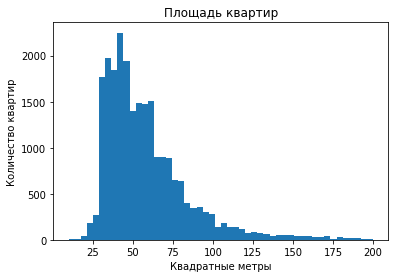

In [44]:
plt.hist(data['total_area_m2'], bins=50, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

* Внушительную часть объявлений занимают квартиры от 30 до 65 метров квадратных

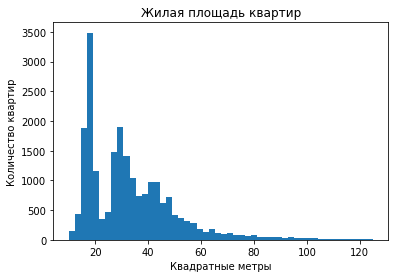

In [45]:
plt.hist(data['living_area_m2'], bins=50, range=(10,125))
plt.title('Жилая площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

* Жилая площадь имеет два пика в 18 и 30 м

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Выводы по делу получились. Согласен. 

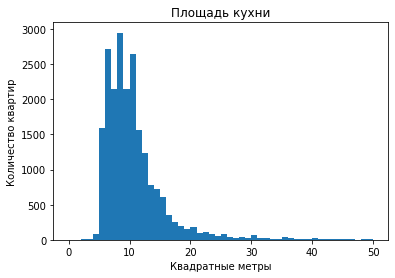

In [46]:
plt.hist(data['kitchen_area_m2'], bins=50, range=(0,50))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

* Площадь кухонь преимущественно от 5 до 15м

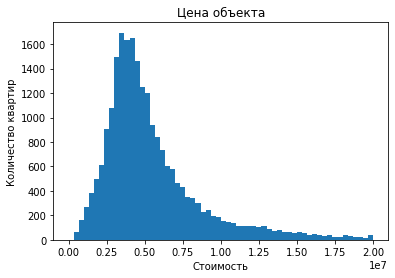

In [47]:
plt.hist(data['last_price'], bins=60, range=(0,20000000))
plt.title('Цена объекта')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

* Преобладает цена в диапозоне от 2,5 млн до 7 млн

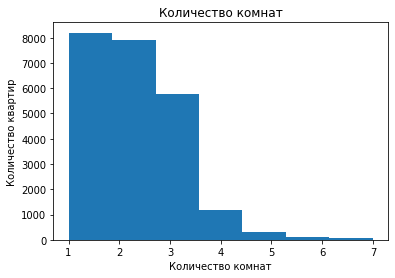

In [48]:
plt.hist(data['number_of_rooms'], bins=7, range=(1,7))
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

* В основном в объявленипях указаны квартиры с 1-ой, 2-мя и 3-мя комнатами. Есть доля 4-комнатных квартир. Сушественно меньшую долю составляет недвижимость более 5-ти комнат

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Распределение по комнатам логически соотносится с распределением по площади. 

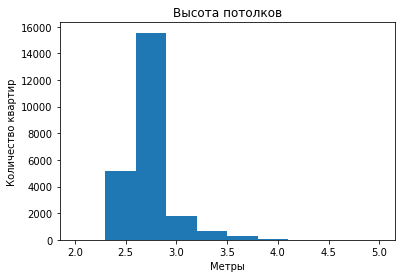

In [49]:
plt.hist(data['ceiling_height_m'], bins=10)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

* Большинство вариантов имеют высоту потолков от 2,5 до 3 метров.

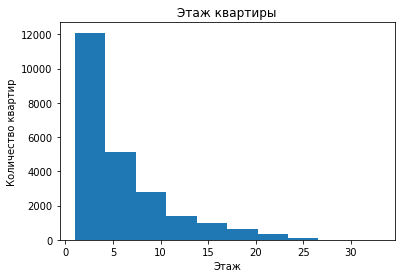

In [50]:
plt.hist(data['floor'], bins=10)
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

* Этаж квартиры. Самая большая доля продаваемых квартир находится в диапозоне от 1 до 5 этажа.

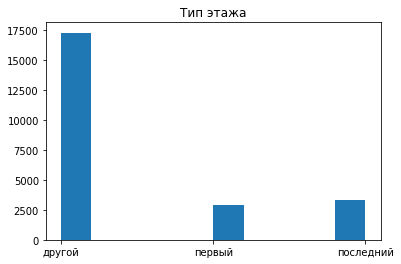

In [51]:
plt.hist(data['floor_type'])
plt.title('Тип этажа')
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Квартиры на первом этаже пользуются наименьшим спросом. 

* Квартир на первом и последнем этаже приблизительно одинаково, от 2500 до 3000. Но, основная часть квартир находяися на "других" этажах.

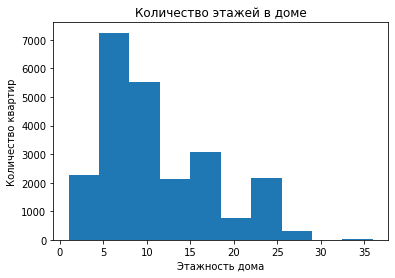

In [52]:
plt.hist(data['total_floors_in_house'], bins=10)
plt.title('Количество этажей в доме')
plt.xlabel('Этажность дома')
plt.ylabel('Количество квартир')
plt.show()

* На данном показателе есть зависимость: чем высотнее здание, тем меньше квартир на продажу в них встречается. Вероятно, более высокие дома - новее. Возможно жители высоток не так активно готовы менять жильё.

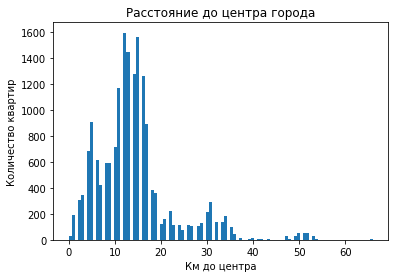

In [53]:
plt.hist(data['city_center_distance_km'], bins=100)
plt.title('Расстояние до центра города')
plt.xlabel('Км до центра')
plt.ylabel('Количество квартир')
plt.show()

* Основная масса квартир сосредочена в радиусе от 5 до 20 км от центра города

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Снова отлично по выводам 

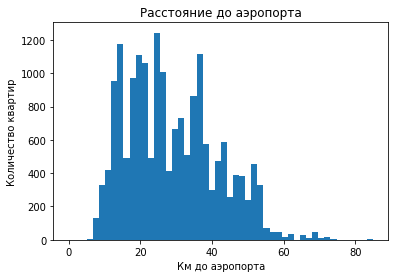

In [54]:
plt.hist(data['nearest_airport_distance_km'], bins=50)
plt.title('Расстояние до аэропорта')
plt.xlabel('Км до аэропорта')
plt.ylabel('Количество квартир')
plt.show()

* Большая часть объявлений приходится на ~20 км от аэропорта

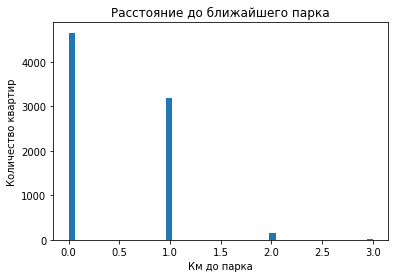

In [55]:
plt.hist(data['nearest_park_distance_km'], bins=50)
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Км до парка')
plt.ylabel('Количество квартир')
plt.show()

* Парки в основной массе находятся в пешей доступности (до 1 км.)

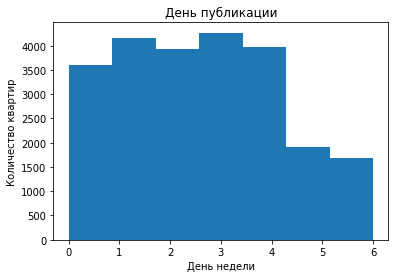

In [56]:
plt.hist(data['weekday'], bins=7)
plt.title('День публикации')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
В выходные дни выставляют объявления меньше всего. Это и логично

* Чаще всего обхявления оставляют в четверг, реже всего в воскресенье. В основном, люди публикуют объявления в будни гораздо чаще, чем в выходные 

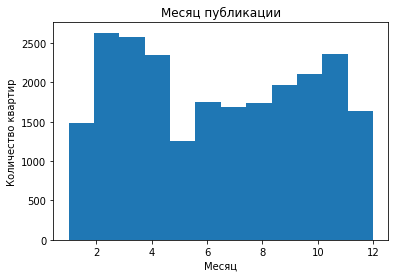

In [57]:
plt.hist(data['month'], bins=12)
plt.title('Месяц публикации')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()

* Большинство поданых объявлений приходится на февраль, март, апрель, ноябрь. В мае было подано в 2 раза меньше объявлений, чем в пиковые месяца

#### Посмотрим на длительность продажи квартир.

In [58]:
round(data['days_exposition'].median()) # Посчитаем и округлим медианное кол-во дней, за которые продавалась недвижимость

95

In [59]:
round(data['days_exposition'].mean()) # Посчитаем и округлим среднее кол-во дней, за которые продавалась недвижимость

181

In [60]:
data['days_exposition'].describe()

count    20365.000000
mean       180.532679
std        219.420362
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Видим огромный размах по количеству дней, и большое стандартное отклонение

<AxesSubplot:ylabel='Frequency'>

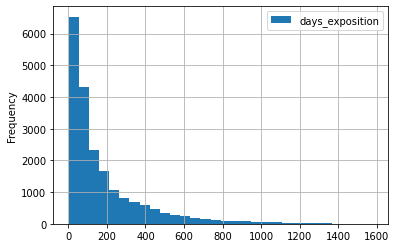

In [61]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True) # Посмотрим на гистограмму по всем значениям

<AxesSubplot:ylabel='Frequency'>

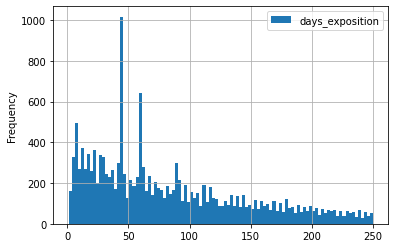

In [62]:
data.plot(y='days_exposition', kind='hist', bins=100, grid=True, range=(1,250)) # Поближе посмотрим на продажи до 250 дней

<AxesSubplot:ylabel='Frequency'>

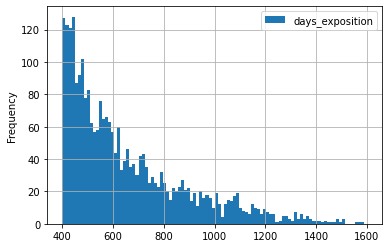

In [63]:
data.plot(y='days_exposition', kind='hist', bins=100, grid=True, range=(400,1600)) # Также рассмотрим долгие продажи

#### 3.1 Вывод: 
Медианное время продажи - 95 дней. Среднее время продажи - 181 день.
Более половины всех квартир продаются за срок в 100 дней. На гистограмме с продажами до 250 дней мы видим сразу 3 пиковых значения: около 45, 60 и 90 дней. Возможно это связано с особенностью размещения объявления на сервисе. 

Верятно есть смысл проверить правила и создать отдельный счетчик по которому объявление при автоудалении(автоснятии), будет попадать в отдельную колонку например ("removed_automatically").


Быстрой, можно назвать продажу до 45-ти дней, Долгой продажей - примерно от 400 дней и дольше.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Очень хорошо, что ты на графике показываешь выбивающиеся значения. Они появились не просто так. В эти дни система убирает с показа бесплатные объявления. 

### 4. Какие факторы больше всего влияют на общую (полную) стоимость объекта:

In [64]:
 data['total_area_m2'].corr(data['last_price']) 

0.6956797482215434

Корреляция между общей площадью и ценой достачно высока. Примерно 0.7

<AxesSubplot:xlabel='total_area_m2'>

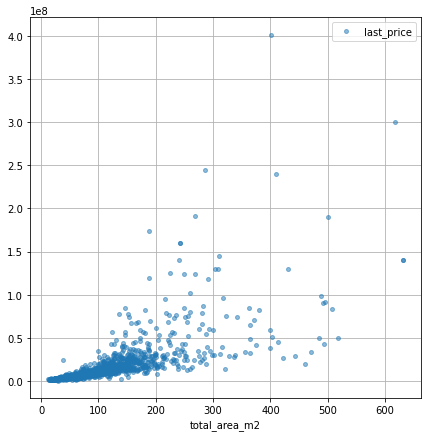

In [65]:
data.pivot_table(index='total_area_m2', values='last_price').plot(grid=True, style='o', figsize=(7, 7),alpha = 0.5,markersize=4)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Подобран хороший метод для того. По данному случаю мы видим, что всеже небольшая связь у нас есть.

*Итог:* Зависимость цены от площади квартиры прослеживается по площиди до 100 кв.м. По графику мы видим, что существенный разброс цен начинается после площади 100 кв.м.

In [66]:
data['living_area_m2'].corr(data['last_price'])

0.597941549487749

Зависимость цены от жилой площади еще меньше, чем в предыдущих наболюдениях и в данном случае составляет примерно 0.6

<AxesSubplot:xlabel='living_area_m2'>

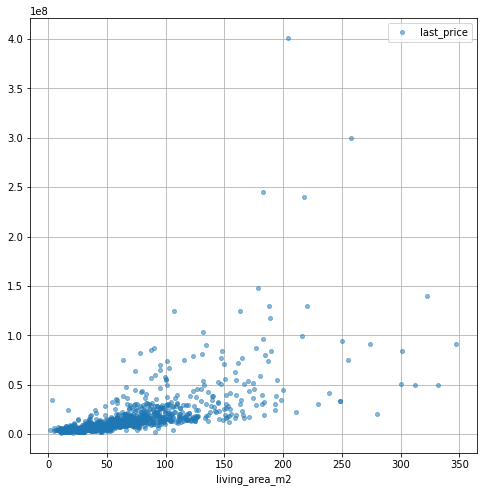

In [67]:
data.pivot_table(index='living_area_m2', values='last_price').plot(grid=True, style='o', figsize=(8, 8),alpha = 0.5,markersize=4)

В данном случае, также наблюдается существенный разброс по ценам, в зависимости от жилой площади, начиная примерно от 52 кв метров.

In [68]:
data['kitchen_area_m2'].corr(data['last_price'])

0.5067416822205395

<AxesSubplot:xlabel='kitchen_area_m2'>

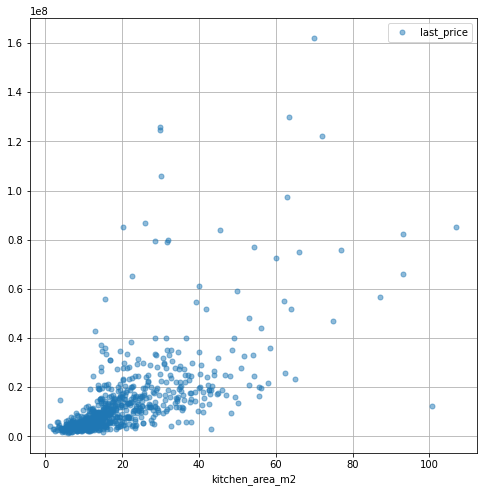

In [69]:
data.pivot_table(index='kitchen_area_m2', values='last_price').plot(grid=True, style='o', figsize=(8, 8),alpha = 0.5, markersize=5)

Корреляция между площадью кухни и ценой продажи достаточно низкая, всего 0.5. Вероятно что смысла искать взаимосвязь между двумя этими показателями - имеет мало смысла. 

In [70]:
data['number_of_rooms'].corr(data['last_price'])

0.3837894653660324

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
А в данном случае уже совсем слабо получается. 

<AxesSubplot:xlabel='number_of_rooms'>

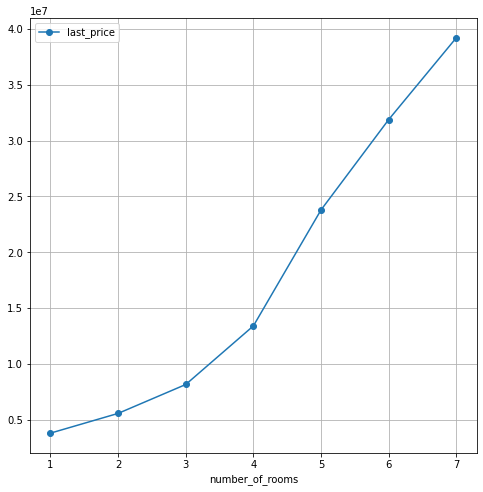

In [71]:
data.pivot_table(index='number_of_rooms', values='last_price').plot(grid=True, style='o-', figsize=(8, 8))

Если мы посмотрим на график, то можем заметить: цена у 1-,2- и 3-комнатных квартир, действительно не сильно отличается. А вот от 4-х комнат и далее график стремительно летит вверх. Т.е. после 4 комнат прослеживается зависимость намного сильнее. Вероятно что с количеством комнат, также значительно растёт общая площадь. Ведь нет смысла делить те же 40 кв.м. на 4 комнаты.

<AxesSubplot:xlabel='floor_type'>

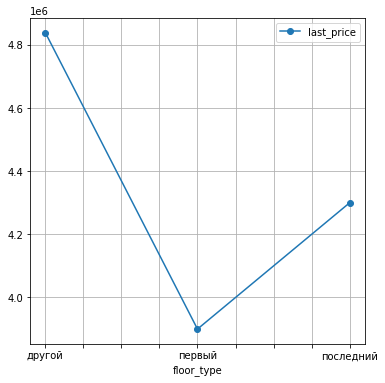

In [72]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(6, 6))

В среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных на "других" этажах

<AxesSubplot:xlabel='weekday'>

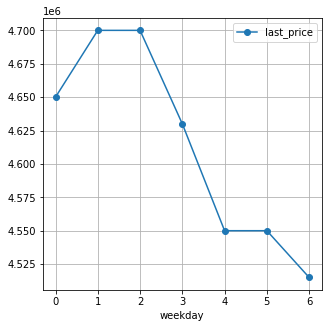

In [73]:
# Зависимость цены от дня недели
data.pivot_table(index='weekday', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))

Из графика можно увидеть, что самые дорогие квартиры выствлялись на продажу во вторник и среду, с каждым следующим днём средняя цена объявления становилась ниже. А, в воскресенье выставлялись самые дешевые.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
И тут по выводу хорошо вшыло. 

<AxesSubplot:xlabel='month'>

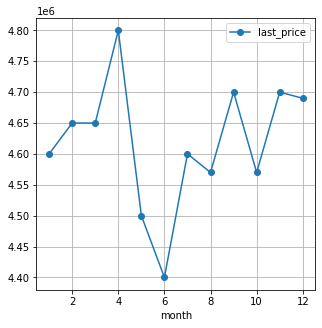

In [74]:
# Зависимость цены от месяца размещения объявления
data.pivot_table(index='month', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))

Если смотреть на цену квартиры по месяцу выставления на продажу, то мы увидим, что в апреле квартиры выставлялись дороже всего, а в июне наоборот - дешевле всех. На рынке недвижимости, как и во многих других сферах присутствует сезонность - в начале лета мы видим наименьшее предложение как по количеству, так и по стоимости недвижимости. Вероятно, пользователи выкладывают объявления летом, только в срочных случаях, а также с самой низкой ценой.

<AxesSubplot:xlabel='year'>

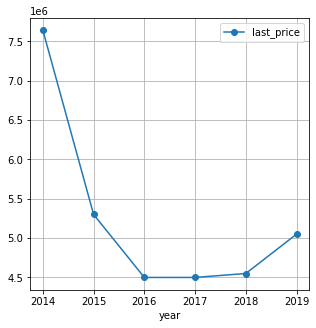

In [75]:
# Зависимость цены от года размещения объявления
data.pivot_table(index='year', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))

Цена квартир с 2014 по 2016 года сильно "провалилась" вниз. с 2016 по 2018 год цена квартир была стабильна, а после 2018 медленно стала расти, в среднем на 500т.р.

### 5. Средняя цена одного квадратного метра в топ-10 населённых пунктах

In [76]:
# Создадим новую переменную с 10 городами по количеству объявлений
top_ten_cities = data['locality_name'].value_counts().head(10)

In [77]:
# Cоздаем сводную таблицу со средним значением квадратного метра для каждого населенного пункта из топ-10
city_price_per_m2 = data.query('locality_name in (@top_ten_cities.index)').pivot_table(index='locality_name', values='price_per_m2' )

Text(0.5, 1.0, 'Цена квадратного метра по населенным пунктам')

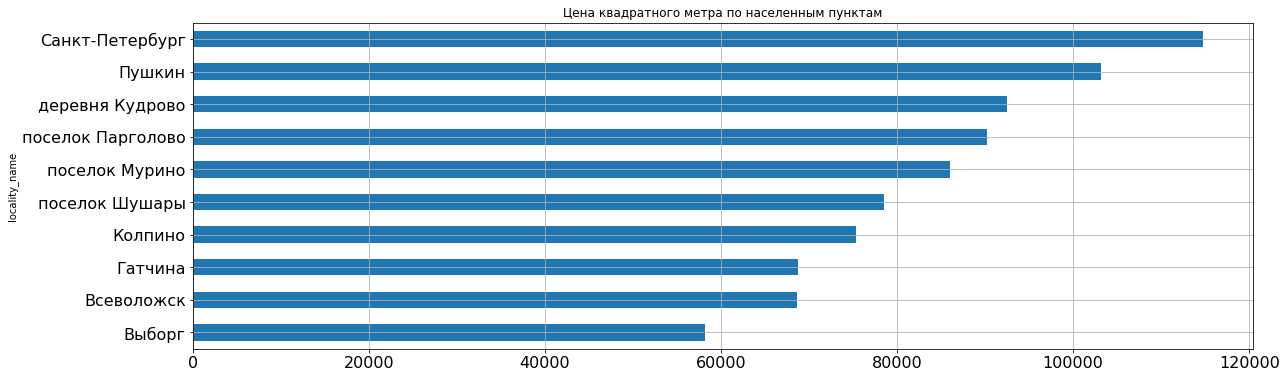

In [78]:
# Построим график
city_price_per_m2.sort_values('price_per_m2').plot(kind='barh', figsize=(19,6), legend=False, fontsize=16, grid=True)
plt.title('Цена квадратного метра по населенным пунктам')

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Рейтинг топ-10 по городам получен. Спасибо за график. С ним намного понятнее стало

#### 5.1 Вывод: 

Ожидаемо, самая дорогой квадратный метр в Санкт-Петербурге. Самый дешевый квадратный метр в Выборге

In [79]:
data['last_price'] = data['last_price'].astype('int')

<AxesSubplot:xlabel='city_center_distance_km'>

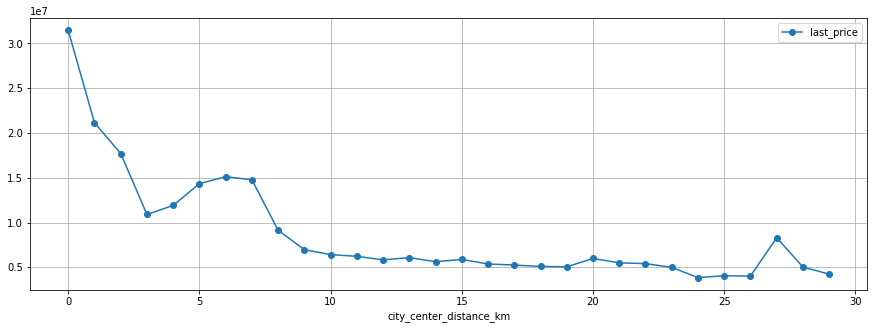

In [80]:
# Выберем
spb_data_filtered = data.query('city_center_distance_km < 40 and locality_name == "Санкт-Петербург"')\
    .pivot_table(index='city_center_distance_km', values='last_price', aggfunc='mean')

spb_data_filtered.plot(style='o-', grid=True, figsize=(15, 5))

#### 5.2 Вывод: 
Вартиры, находящиеся в центре, резко отличаются в цене от тех, которые находятся на расстоянии всего 1 км от центра. Цена квартир в радиусе 1-2 км от центра практически одинакова. Далее наблюдается тенденция к снижению стоимости по мере удаления от центра. С 3 до 7 км от центра цена растет, но незначительными темпами. Начиная с 7 км от центра, цена вновь стремится вниз по мере увеличения расстояния. В диапазоне от 12 до 23 км цены варьируются в одном диапазоне. Также на 27 км, вероятно, присутствуют "элитные" объекты. 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
По этому графику хорошо видно, как ведет себя зависимость цены от центра. После 8 км она перестает резко падать. Это нам говорит о том, что закончилась зона центра города. 

---

### Напишите общий вывод

**Обработка** Мы получили на входе датафрэйм с достаточно внушительным объемом пропущенных значений. Мы обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы. 

**Посчитали и добавили в таблицу** цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир для дальнейшего анализа. 

**Изучая время продажи квартир** мы выявили, что большая часть квартир продается до 100 дней. но так же много встречается квартир, которые продаются до 400 дней, поэтому срок продажи квартиры до 400 дней можно считать нормальным.

**Стоимость квартиры** больше всего зависит от общей площади, этажа квартиры и конечно же года продажи. 

**Зависимость цены от расположения квартиры** прослеживается, и это очевидно: во всех крупных городах квартиры, находящиеся ближе к центру стоят дороже. Эта зависимость прослеживается на расстоянии до 12 км от центра, далее удаленность не особо сказывается на цене.

Для совершенствования сбора данных, рекомендую пересмотреть некоторые формы при формировании объявлений. Вместо ручного ввода, пользователю можно предложить выбирать из выпадающего списка, такие данные как: тип недвижимости, название наслённого пункта. Также предлагаю добавить отдельный счетчик для объявлений, которые были убраны с сайта автоматически. 

Проведенный анализ может не только увидеть анамальные цены и препятствовать мошенничеству, но также может стать основой для улучшения пользовательского опыта, путём добавления аналитического интерфейса прямо на сайт, на страницу с объявлением, где пользователь самостоятельно сможет, по графику, отслеживать, к примеру, цену квадратного метра в определённом районе, с историей изменения. 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Вывод, как и остальной проект, стал классным его завершением. Ты здесь подробно описываешь всю суть исследования без воды. Вот именно, что четко по фактам. Теперь точно сможем составить-антифрод систему для Сервиса Недвижимости.

<div class="alert alert-block alert-info">
 
### Итоговый Комментарий ревьюера
    
#### Успех
    
Благодарю тебя за выполнение работы. Мне понравился твой проект за структурность и последовательность. Во многих местах ты подбираешь оптимальный код и автоматизируешь свою работу, а это очень пригодится в будущем. Выделить бы хотел Предобработку данных. На мой взгляд она получилась особенно удачно. Очень насыщенный итоговый вывод вышел. Старайся такие выводы делать и в будущем. 
    
    
Однако, в проекте есть несколько замечаний, которые надо исправить:

* Промежуточные выводы добавить.
* Посчитать количество уникальных значений в названиях. 
       
Еще я оставил рекомендации. Очень надеюсь, что ты учтешь их в этом и последующих проектах.
       
Жду проект после доработки. Уверен, ты справишься.
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x] В таблицу добавлены новые параметры:
       – цена одного квадратного метра; 
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.); 
       – месяц публикации объявления; 
       – год публикации объявления; 
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах. 
- [x] Изучены и описаны параметры:
        - общая площадь; 
        - жилая площадь; 
        - площадь кухни; 
        - цена объекта; 
        - количество комнат; 
        - высота потолков; 
        - тип этажа квартиры («первый», «последний», «другой»); 
        - общее количество этажей в доме; 
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь; 
        - жилая площадь;
        - площадь кухни; 
        - количество комнат; 
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города; 
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.